## [Computational Social Science] Project 5: Natural Language Processing

In this project, you will use natural language processing techniques to explore a dataset containing tweets from members of the 116th United States Congress that met from January 3, 2019 to January 2, 2021. The dataset has also been cleaned to contain information about each legislator. Concretely, you will do the following:

* Preprocess the text of legislators' tweets
* Conduct Exploratory Data Analysis of the text
* Use sentiment analysis to explore differences between legislators' tweets
* Featurize text with manual feature engineering, frequency-based, and vector-based techniques
* Predict legislators' political parties and whether they are a Senator or Representative

You will explore two questions that relate to two central findings in political science and examine how they relate to the text of legislators' tweets. First, political scientists have argued that U.S. politics is currently highly polarized relative to other periods in American history, but also that the polarization is asymmetric. Historically, there were several conservative Democrats (i.e. "blue dog Democrats") and liberal Republicans (i.e. "Rockefeller Republicans"), as measured by popular measurement tools like [DW-NOMINATE](https://en.wikipedia.org/wiki/NOMINATE_(scaling_method)#:~:text=DW\%2DNOMINATE\%20scores\%20have\%20been,in\%20the\%20liberal\%2Dconservative\%20scale.). However, in the last few years, there are few if any examples of any Democrat in Congress being further to the right than any Republican and vice versa. At the same time, scholars have argued that this polarization is mostly a function of the Republican party moving further right than the Democratic party has moved left. **Does this sort of asymmetric polarization show up in how politicians communicate to their constituents through tweets?**

Second, the U.S. Congress is a bicameral legislature, and there has long been debate about partisanship in the Senate versus the House. The House of Representatives is apportioned by population and all members serve two year terms. In the Senate, each state receives two Senators and each Senator serves a term of six years. For a variety of reasons (smaller chamber size, more insulation from the voters, rules and norms like the filibuster, etc.), the Senate has been argued to be the "cooling saucer" of Congress in that it is more bipartisan and moderate than the House. **Does the theory that the Senate is more moderate have support in Senators' tweets?**

**Note**: See the project handout for more details on caveats and the data dictionary.

In [1]:
# download libraries
# ----------
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
!pip install textblob


In [3]:
!pip install gensim


In [4]:
# pandas and numpy
import spacy
import en_core_web_sm
import pandas as pd
import numpy as numpy

# punctuation, stop words and English language model
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
nlp = en_core_web_sm.load()

# textblob
from textblob import TextBlob

# countvectorizer, tfidfvectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# gensim
import gensim
from gensim import models

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

Saving 116th Congressional Tweets and Demographics.csv to 116th Congressional Tweets and Demographics.csv


In [3]:
import pandas as pd

df = pd.read_csv('/content/116th Congressional Tweets and Demographics.csv')

print(df.head())


       tweet_id screen_name                   datetime  \
0  1.081010e+18    RepByrne  2019-01-03T21:23:00-05:00   
1  1.080880e+18    RepByrne  2019-01-03T12:30:38-05:00   
2  1.080830e+18    RepByrne  2019-01-03T09:12:07-05:00   
3  1.080890e+18    RepByrne  2019-01-03T13:20:53-05:00   
4  1.080870e+18    RepByrne  2019-01-03T12:10:26-05:00   

                                                text name_wikipedia position  \
0  Great news for Baldwin County! The economy of ...  Bradley Byrne      Rep   
1  Outstanding news today from @Airbus! @JetBlue ...  Bradley Byrne      Rep   
2  RT @senatemajldr Democrats will have to get se...  Bradley Byrne      Rep   
3  Here is a sign of things to come: As Democrats...  Bradley Byrne      Rep   
4  Let's understand what we're dealing with here:...  Bradley Byrne      Rep   

  joined_congress_date   birthday gender state district_number       party  \
0             8-Jan-14  2/16/1955      M    AL               1  Republican   
1             

In [4]:
df.head()

,tweet_id,screen_name,datetime,text,name_wikipedia,position,joined_congress_date,birthday,gender,state,district_number,party,trump_2016_state_share,clinton_2016_state_share,obama_2012_state_share,romney_2012_state_share
0,1.081010e+18,RepByrne,2019-01-03T21:23:00-05:00,Great news for Baldwin County! The economy of ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
1,1.080880e+18,RepByrne,2019-01-03T12:30:38-05:00,Outstanding news today from @Airbus! @JetBlue ...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
2,1.080830e+18,RepByrne,2019-01-03T09:12:07-05:00,RT @senatemajldr Democrats will have to get se...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
3,1.080890e+18,RepByrne,2019-01-03T13:20:53-05:00,Here is a sign of things to come: As Democrats...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"
4,1.080870e+18,RepByrne,2019-01-03T12:10:26-05:00,Let's understand what we're dealing with here:...,Bradley Byrne,Rep,8-Jan-14,2/16/1955,M,AL,1,Republican,"1,318,255","729,547","795,696","1,255,925"


In [5]:
df['text'].head()

,text
0,Great news for Baldwin County! The economy of ...
1,Outstanding news today from @Airbus! @JetBlue ...
2,RT @senatemajldr Democrats will have to get se...
3,Here is a sign of things to come: As Democrats...
4,Let's understand what we're dealing with here:...


In [6]:
# using the split function to create tokens
# ----------
text = df['text'][0]  # the [0] takes the very first record
sentences = text.split(".")                     # split by decimal point
for s in sentences[:5]:                         # take just the first 5 sentences
    print(s + '\n')                             # "\" sets it on a new line

Great news for Baldwin County! The economy of Southwest Alabama continues to thrive, and I am proud to support pro-growth policies in Washington to continue the economic boom


https://lagniappemobile

com/booming-baldwin-continues-to-lead-state-economically/



In [7]:
# use a different parameter in the split function to create tokens using a " " (space)
# ----------
sentence = sentences[0]                 # take the first sentence from our "sentences" object
print("Sentence to split: ", sentence)  # visualize the sentence we we splitting
tokens = sentence.split(" ")            # split by " " a space this time
tokens                                  # print the token

Sentence to split:  Great news for Baldwin County! The economy of Southwest Alabama continues to thrive, and I am proud to support pro-growth policies in Washington to continue the economic boom


['Great',
 'news',
 'for',
 'Baldwin',
 'County!',
 'The',
 'economy',
 'of',
 'Southwest',
 'Alabama',
 'continues',
 'to',
 'thrive,',
 'and',
 'I',
 'am',
 'proud',
 'to',
 'support',
 'pro-growth',
 'policies',
 'in',
 'Washington',
 'to',
 'continue',
 'the',
 'economic',
 'boom']

In [12]:
import spacy

nlp = spacy.load("en_core_web_sm")  # Correct way to load the model


In [14]:


doc = nlp(text)                             # apply the nlp language model to process the text object from above
spacy_words = [token.text for token in doc] # create a list of words from doc object (this is a list comprehension)
display(f"Tokenized words:{spacy_words}")  # fancier way to displaying an object using the f-string formatting
print(spacy_words)


# general syntax for list comprehension: [expression for item in iterable]

"Tokenized words:['Great', 'news', 'for', 'Baldwin', 'County', '!', 'The', 'economy', 'of', 'Southwest', 'Alabama', 'continues', 'to', 'thrive', ',', 'and', 'I', 'am', 'proud', 'to', 'support', 'pro', '-', 'growth', 'policies', 'in', 'Washington', 'to', 'continue', 'the', 'economic', 'boom', '.', '\\n', 'https://lagniappemobile.com/booming-baldwin-continues-to-lead-state-economically/']"

['Great', 'news', 'for', 'Baldwin', 'County', '!', 'The', 'economy', 'of', 'Southwest', 'Alabama', 'continues', 'to', 'thrive', ',', 'and', 'I', 'am', 'proud', 'to', 'support', 'pro', '-', 'growth', 'policies', 'in', 'Washington', 'to', 'continue', 'the', 'economic', 'boom', '.', '\n', 'https://lagniappemobile.com/booming-baldwin-continues-to-lead-state-economically/']


## Preprocessing

The first step in working with text data is to preprocess it. Make sure you do the following:

* Remove punctuation and stop words. The `rem_punc_stop()` function we used in lab is provided to you but you should feel free to edit it as necessary for other steps
* Remove tokens that occur frequently in tweets, but may not be helpful for downstream classification. For instance, many tweets contain a flag for retweeting, or share a URL

As you search online, you might run into solutions that rely on regular expressions. You are free to use these, but you should also be able to preprocess using the techniques we covered in lab. Specifically, we encourage you to use spaCy's token attributes and string methods to do some of this text preprocessing.

In [15]:
# load STOP_WORDS module from spaCy library
# ----------
from spacy.lang.en.stop_words import STOP_WORDS

In [16]:
# list stop words 1-11 from the library
# ----------
list(STOP_WORDS)[0:10]

['down',
 'enough',
 'n‘t',
 'sometimes',
 'before',
 'hereafter',
 'whom',
 'once',
 'anywhere',
 'so']

In [17]:
# load punctuation module from string library
# ----------
from string import punctuation  # note that this is a base library
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
# load punctuation module from string library
# ----------

# initalize an empty list
tokens_reduced = []

# create a function to remove punctuation and stop words
def rem_punc_stop(text):

    # set objects
    stop_words = STOP_WORDS         # set STOP_WORDS to a new object variable
    punc = set(punctuation)         # convert punctuation to a set

    # essentially remove the punctuation - important to remove punctuation first to correctly capture stop words
    punc_free = "".join([ch for ch in text if ch not in punc]) # join new list of characters (ch) in text w/ condition
                                                               # if ch is not in punctuation
                                                               # "".join() creates a string from the list comprehension

    # apply nlp to punctuation-free object
    doc = nlp(punc_free)

    # extract words from processed text
    spacy_words = [token.text for token in doc]
    spacy_words = [word for word in spacy_words if not word.startswith('http')]

    # filter out words
    no_punc = [word for word in spacy_words if word not in stop_words]

    # return
    return no_punc

In [19]:
# apply function
# ----------

# apply our new function to our text object from above
tokens_reduced = rem_punc_stop(text)

# view the first 5 tokens
tokens_reduced[0:5]

['Great', 'news', 'Baldwin', 'County', 'The']

## Exploratory Data Analysis

Use two of the techniques we covered in lab (or other techniques outside of lab!) to explore the text of the tweets. You should construct these visualizations with an eye toward the eventual classification tasks: (1) predicting the legislator's political party based on the text of their tweet, and (2) predicting whether the legislator is a Senator or Representative. As a reminder, in lab we covered word frequencies, word clouds, word/character counts, scattertext, and topic modeling as possible exploration tools.

### EDA 1

In [20]:
!pip install scattertext


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 38.5 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9298 sha256=3cac010a4a29800e6ce6cacab092ad30272d3ac7cb73ce3f3d578a9dd5512a57
  Stored in directory: /root/.cache/pip/wheels/49/20/47/f03dfa8a7239c54cbc44ff7389eefbf888d2c1873edaaec888
Successfully built flashtext


In [21]:
!pip install wordcloud


In [22]:

import pandas as pd
import numpy as np
from PIL import Image
import spacy
import en_core_web_sm
import scattertext as st
nlp = en_core_web_sm.load()
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

%matplotlib inline

In [23]:


print(df.head())

df['text'].unique()

       tweet_id screen_name                   datetime  \
0  1.081010e+18    RepByrne  2019-01-03T21:23:00-05:00   
1  1.080880e+18    RepByrne  2019-01-03T12:30:38-05:00   
2  1.080830e+18    RepByrne  2019-01-03T09:12:07-05:00   
3  1.080890e+18    RepByrne  2019-01-03T13:20:53-05:00   
4  1.080870e+18    RepByrne  2019-01-03T12:10:26-05:00   

                                                text name_wikipedia position  \
0  Great news for Baldwin County! The economy of ...  Bradley Byrne      Rep   
1  Outstanding news today from @Airbus! @JetBlue ...  Bradley Byrne      Rep   
2  RT @senatemajldr Democrats will have to get se...  Bradley Byrne      Rep   
3  Here is a sign of things to come: As Democrats...  Bradley Byrne      Rep   
4  Let's understand what we're dealing with here:...  Bradley Byrne      Rep   

  joined_congress_date   birthday gender state district_number       party  \
0             8-Jan-14  2/16/1955      M    AL               1  Republican   
1             

array(['Great news for Baldwin County! The economy of Southwest Alabama continues to thrive, and I am proud to support pro-growth policies in Washington to continue the economic boom.\nhttps://lagniappemobile.com/booming-baldwin-continues-to-lead-state-economically/',
       'Outstanding news today from @Airbus! @JetBlue is ordering 60 Airbus A220-300 aircraft and start-up airliner Moxy has ordered 60 Airbus A220-300s. More work for the outstanding team in Mobile! https://twitter.com/mynbc15/status/1080838333687828480 QT @mynbc15 Two airlines looking to purchase Airbus A220 jets to be built in Mobile\nhttps://mynbc15.com/news/local/two-airlines-looking-to-purchase-airbus-a220-jets-to-be-built-in-mobile http://pbs.twimg.com/media/Dv_ouOtWkAE2COa.jpg',
       "RT @senatemajldr Democrats will have to get serious about border security so that a government funding agreement can pass the House, earn 60 votes in the Senate, and receive a presidential signature. All three of these things are n

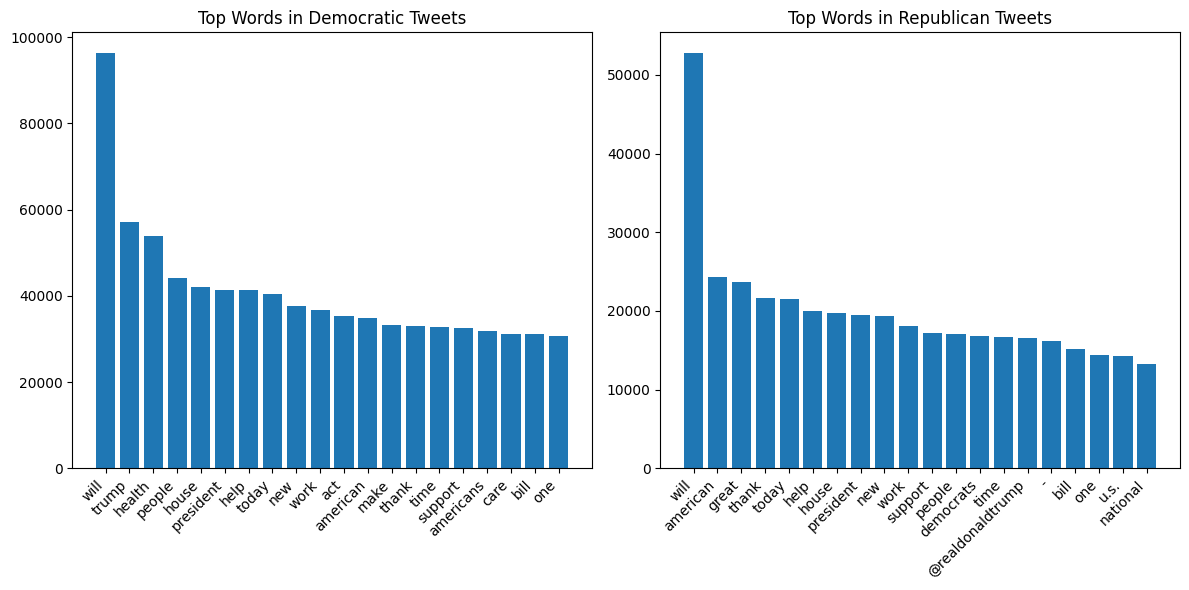

In [24]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

# Define stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["the", "https", "co", "RT", "I", "you", "we","&amp;","RT","to","and","of","a","in","for","is","ours","on","that","i","this","are","with","The","have","rt","qt","must","need","us"])  # Add custom words

# Function to remove stopwords
def remove_stopwords(word_list):
    return [word.lower() for word in word_list if word.lower() not in custom_stopwords]

# Process words for Democrats and Republicans
dem_words = remove_stopwords(' '.join(df[df['party'] == 'Democrat']['text']).split())
rep_words = remove_stopwords(' '.join(df[df['party'] == 'Republican']['text']).split())

# Count word frequencies
dem_word_counts = Counter(dem_words).most_common(20)
rep_word_counts = Counter(rep_words).most_common(20)

plt.figure(figsize=(12, 6))

# Democratic bar chart
plt.subplot(1, 2, 1)
plt.bar([x[0] for x in dem_word_counts], [x[1] for x in dem_word_counts])
plt.title('Top Words in Democratic Tweets')
plt.xticks(rotation=45, ha='right')

# Republican bar chart
plt.subplot(1, 2, 2)
plt.bar([x[0] for x in rep_word_counts], [x[1] for x in rep_word_counts])
plt.title('Top Words in Republican Tweets')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### EDA 2

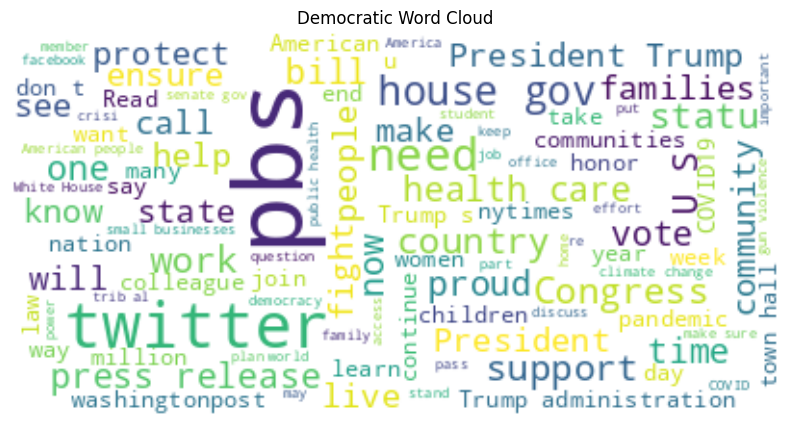

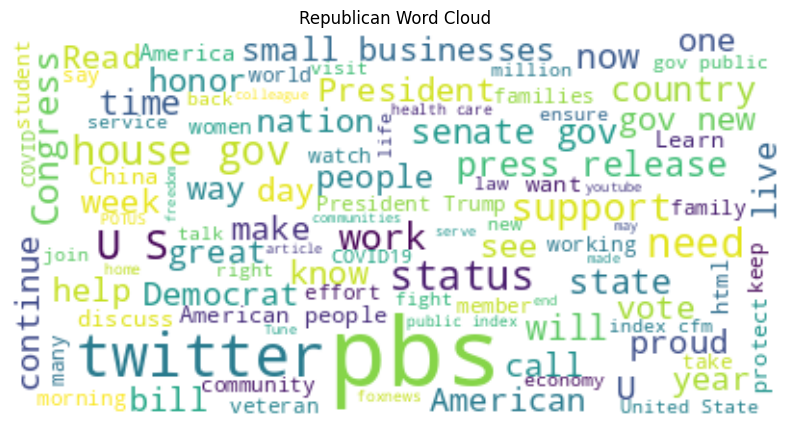

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Define words to remove
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["the", "https", "co", "RT", "I", "you", "we","twimg","vid","video","jpg","480x270","mp4","ext_tw_video","tag","ext_tw_video_thumb","png","amplify_video_thumb","img","pu","QT","thank","media","pb","amplify_video_vid","amplify_video","today","amp","Thanks","realDonaldTrump"])
# Democratic word cloud
dem_text = ' '.join(df[df['party'] == 'Democrat']['text'])
wordcloud_dem = WordCloud(stopwords=custom_stopwords, max_font_size=50, max_words=100, background_color="white").generate(dem_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_dem, interpolation="bilinear")
plt.axis("off")
plt.title("Democratic Word Cloud")
plt.show()

# Republican word cloud
rep_text = ' '.join(df[df['party'] == 'Republican']['text'])
wordcloud_rep = WordCloud(stopwords=custom_stopwords, max_font_size=50, max_words=100, background_color="white").generate(rep_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_rep, interpolation="bilinear")
plt.axis("off")
plt.title("Republican Word Cloud")
plt.show()


## Sentiment Analysis

Next, let's analyze the sentiments contained within the tweets. You may use TextBlob or another library for these tasks. Do the following:

* Choose two legislators, one who you think will be more liberal and one who you think will be more conservative, and analyze their sentiment and/or subjectivity scores per tweet. For instance, you might do two scatterplots that plot each legislator's sentiment against their subjectivity, or two density plots for their sentiments. Do the scores match what you thought?
* Plot two more visualizations like the ones you chose in the first part, but do them to compare (1) Democrats v. Republicans and (2) Senators v. Representatives

`TextBlob` has already been imported in the top cell.

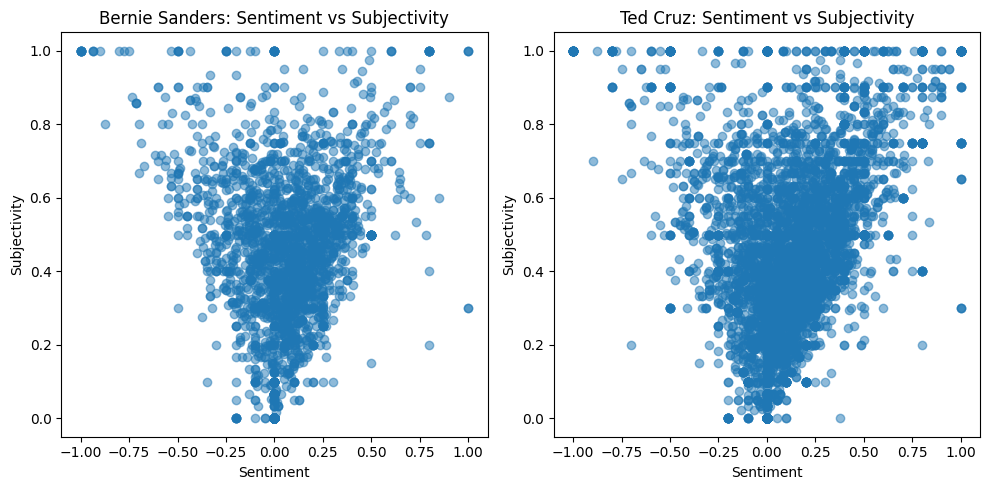

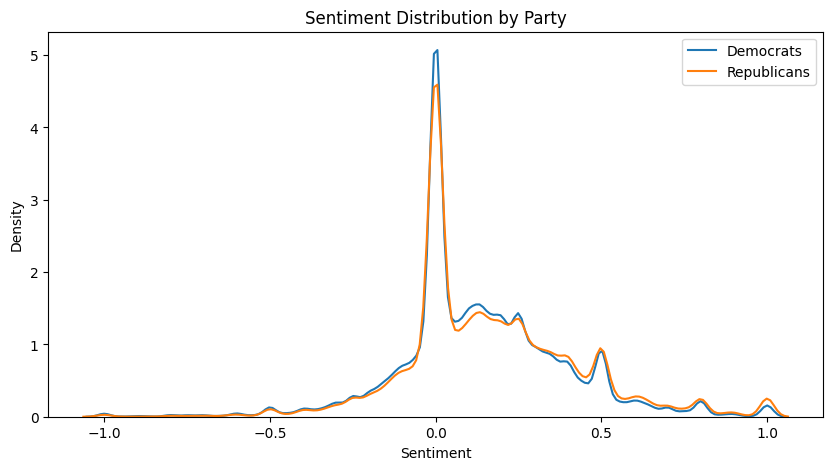

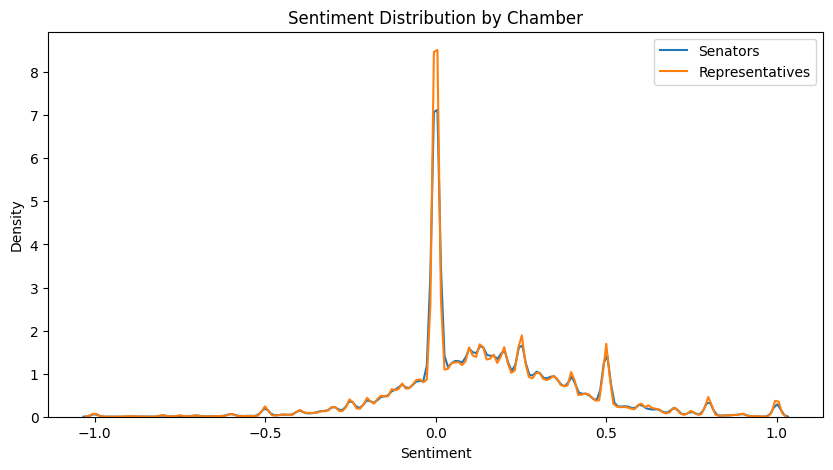

In [26]:

# Function to get sentiment scores
def get_sentiment(text):
    if pd.isna(text) or text == "":
        return (0, 0)  # neutral sentiment and subjectivity for empty text

    analysis = TextBlob(text)
    return (analysis.sentiment.polarity, analysis.sentiment.subjectivity)

# Apply sentiment analysis
df['sentiment'] = df['text'].apply(lambda x: get_sentiment(x)[0])
df['subjectivity'] = df['text'].apply(lambda x: get_sentiment(x)[1])

# Select two legislators (for example, Bernie Sanders and Ted Cruz)
bernie = df[df['screen_name'] == 'SenSanders']
cruz = df[df['screen_name'] == 'SenTedCruz']

# Create scatterplots for the two legislators
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(bernie['sentiment'], bernie['subjectivity'], alpha=0.5)
plt.title('Bernie Sanders: Sentiment vs Subjectivity')
plt.xlabel('Sentiment')
plt.ylabel('Subjectivity')

plt.subplot(1, 2, 2)
plt.scatter(cruz['sentiment'], cruz['subjectivity'], alpha=0.5)
plt.title('Ted Cruz: Sentiment vs Subjectivity')
plt.xlabel('Sentiment')
plt.ylabel('Subjectivity')
plt.tight_layout()
plt.show()


# Compare Democrats vs Republicans
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['party'] == 'Democrat']['sentiment'], label='Democrats')
sns.kdeplot(df[df['party'] == 'Republican']['sentiment'], label='Republicans')
plt.title('Sentiment Distribution by Party')
plt.xlabel('Sentiment')
plt.legend()
plt.show()

# Compare Senators vs Representatives

plt.figure(figsize=(10, 5))


sns.kdeplot(df[df['position'] == 'Sen']['sentiment'], label='Senators', bw_adjust=0.5)
sns.kdeplot(df[df['position'] == 'Rep']['sentiment'], label='Representatives', bw_adjust=0.5)

plt.title('Sentiment Distribution by Chamber')
plt.xlabel('Sentiment')
plt.legend()
plt.show()


## Featurization

Before going to classification, explore different featurization techniques. Create three dataframes or arrays to represent your text features, specifically:

* Features engineered from your previous analysis. For example, word counts, sentiment scores, topic model etc.
* A term frequency-inverse document frequency matrix.
* An embedding-based featurization (like a document averaged word2vec)

In the next section, you will experiment with each of these featurization techniques to see which one produces the best classifications.

In [27]:
import pandas as pd

# Load your dataset (modify the filename if needed)
df = pd.read_csv('/content/116th Congressional Tweets and Demographics.csv')

# Check if it's loaded correctly
print(df.head())  # Print first 5 rows


       tweet_id screen_name                   datetime  \
0  1.081010e+18    RepByrne  2019-01-03T21:23:00-05:00   
1  1.080880e+18    RepByrne  2019-01-03T12:30:38-05:00   
2  1.080830e+18    RepByrne  2019-01-03T09:12:07-05:00   
3  1.080890e+18    RepByrne  2019-01-03T13:20:53-05:00   
4  1.080870e+18    RepByrne  2019-01-03T12:10:26-05:00   

                                                text name_wikipedia position  \
0  Great news for Baldwin County! The economy of ...  Bradley Byrne      Rep   
1  Outstanding news today from @Airbus! @JetBlue ...  Bradley Byrne      Rep   
2  RT @senatemajldr Democrats will have to get se...  Bradley Byrne      Rep   
3  Here is a sign of things to come: As Democrats...  Bradley Byrne      Rep   
4  Let's understand what we're dealing with here:...  Bradley Byrne      Rep   

  joined_congress_date   birthday gender state district_number       party  \
0             8-Jan-14  2/16/1955      M    AL               1  Republican   
1             

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim.downloader as api



### Engineered Text Features

In [29]:
# Step 1: Install & Import TextBlob
!pip install textblob
from textblob import TextBlob
import pandas as pd

# Step 2: Load your dataset
df = pd.read_csv('/content/116th Congressional Tweets and Demographics.csv')

# Step 3: Define the function
def extract_features(text):
    features = {}

    # Word count
    features['word_count'] = len(text.split())

    # Sentiment analysis using TextBlob
    blob = TextBlob(text)
    features['sentiment'] = blob.sentiment.polarity
    features['subjectivity'] = blob.sentiment.subjectivity

    return features

# Step 4: Apply the function
manual_features = df['text'].apply(extract_features).apply(pd.Series)
manual_features['party'] = df['party']
manual_features['position'] = df['position']

# Print the first few rows to confirm it's working
print(manual_features.head())


   word_count  sentiment  subjectivity       party position
0        29.0   0.666667      0.650000  Republican      Rep
1        47.0   0.583333      0.750000  Republican      Rep
2        48.0  -0.333333      0.666667  Republican      Rep
3        63.0   0.030606      0.397576  Republican      Rep
4        19.0   0.000000      0.000000  Republican      Rep


In [35]:
!pip install --force-reinstall pandas==2.2.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.9/507.9 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.1
    Uninstalling pytz-2025.1:
      Successfully uninstalled pytz-2025.1
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.1
    Uninstalling tzdata-2025.1:
      Successfully uninstalled tzdata-2025.1
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.

In [1]:
# Install dependencies
!pip install nltk swifter

# Import necessary libraries
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import swifter  # For parallel processing (optional)

# Download the required nltk data
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv('/content/116th Congressional Tweets and Demographics.csv')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis (faster method)
df['sentiment'] = df['text'].swifter.apply(lambda x: sia.polarity_scores(x)['compound'])
df['subjectivity'] = df['text'].swifter.apply(lambda x: sia.polarity_scores(x)['neu'])

# Add word count as a feature
df['word_count'] = df['text'].swifter.apply(lambda x: len(x.split()))

# Add hashtag count as a feature
df['hashtag_count'] = df['text'].swifter.apply(lambda x: x.count('#'))

# Add uppercase word count
df['uppercase_count'] = df['text'].swifter.apply(lambda x: sum(1 for word in x.split() if word.isupper()))

# Print first few rows to check
print(df[['text', 'sentiment', 'subjectivity', 'word_count', 'hashtag_count', 'uppercase_count']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Pandas Apply:   0%|          | 0/946791 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/946791 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/946791 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/946791 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/946791 [00:00<?, ?it/s]

                                                text  sentiment  subjectivity  \
0  Great news for Baldwin County! The economy of ...     0.8805         0.710   
1  Outstanding news today from @Airbus! @JetBlue ...     0.9204         0.784   
2  RT @senatemajldr Democrats will have to get se...     0.5730         0.832   
3  Here is a sign of things to come: As Democrats...    -0.0431         0.876   
4  Let's understand what we're dealing with here:...     0.8225         0.610   

   word_count  hashtag_count  uppercase_count  
0          29              0                1  
1          47              0                3  
2          48              0                1  
3          63              0                4  
4          19              0                0  


### Bag-of-words or Tf-idf

In [2]:
# Frequency Based featurization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=500, sublinear_tf=True, max_df=0.9)
tfidf_features = tfidf_vectorizer.fit_transform(df['text'])

tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add metadata columns
tfidf_df['party'] = df['party'].values
tfidf_df['position'] = df['position'].values



In [3]:
# Print the shape of the DataFrame to check if it has data
print("TF-IDF DataFrame shape:", tfidf_df.shape)

# Display the first few rows
print(tfidf_df.head())


TF-IDF DataFrame shape: (946791, 502)
   000   04   05   06   07   10   11   12   13   15  ...  would  www  year  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   

   years  yesterday  you      your  youtube       party  position  
0    0.0        0.0  0.0  0.000000      0.0  Republican       Rep  
1    0.0        0.0  0.0  0.000000      0.0  Republican       Rep  
2    0.0        0.0  0.0  0.000000      0.0  Republican       Rep  
3    0.0        0.0  0.0  0.000000      0.0  Republican       Rep  
4    0.0        0.0  0.0  0.169115      0.0  Republican       Rep  

[5 rows x 502 columns]


### Word Embedding

In [ ]:
# Load Word2Vec model from Google; OPTIONAL depending on your computational resources (the file is ~1 GB)
# Also note that this file path assumes that the word vectors are underneath 'data'; you may wish to point to the CSS course repo and change the path
# or move the vector file to the project repo

#model = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary = True)

In [4]:
import pandas as pd

# Load the dataset (change file path if necessary)
df = pd.read_csv('/content/116th Congressional Tweets and Demographics.csv')

# Check if data is loaded correctly
print(df.head())


       tweet_id screen_name                   datetime  \
0  1.081010e+18    RepByrne  2019-01-03T21:23:00-05:00   
1  1.080880e+18    RepByrne  2019-01-03T12:30:38-05:00   
2  1.080830e+18    RepByrne  2019-01-03T09:12:07-05:00   
3  1.080890e+18    RepByrne  2019-01-03T13:20:53-05:00   
4  1.080870e+18    RepByrne  2019-01-03T12:10:26-05:00   

                                                text name_wikipedia position  \
0  Great news for Baldwin County! The economy of ...  Bradley Byrne      Rep   
1  Outstanding news today from @Airbus! @JetBlue ...  Bradley Byrne      Rep   
2  RT @senatemajldr Democrats will have to get se...  Bradley Byrne      Rep   
3  Here is a sign of things to come: As Democrats...  Bradley Byrne      Rep   
4  Let's understand what we're dealing with here:...  Bradley Byrne      Rep   

  joined_congress_date   birthday gender state district_number       party  \
0             8-Jan-14  2/16/1955      M    AL               1  Republican   
1             

In [6]:
!pip uninstall -y numpy gensim scipy
!pip install --no-cache-dir numpy gensim scipy


Found existing installation: numpy 2.2.3
Uninstalling numpy-2.2.3:
  Successfully uninstalled numpy-2.2.3
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 124.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 188.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 207.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 212.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 119.1 MB/s eta 0:00:00


In [10]:
!pip install numpy==1.23.5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 79.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
pymc 5.20.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 1.38.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
langchain 0.3.19 requires numpy<2,>=1.26.4; python_version < "3.12", but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires n

In [1]:
import gensim.downloader as api
import numpy as np
import pandas as pd

# Load a smaller, faster pre-trained model
word_vectors = api.load('glove-twitter-50')  # Faster than word2vec-google-news-300

def doc_to_vec(text):
    tokens = text.split()  # Basic tokenization

    vectors = [word_vectors[token] for token in tokens if token in word_vectors.key_to_index]

    if not vectors:
        return np.zeros(word_vectors.vector_size)  # Return zero vector for empty cases

    return np.mean(vectors, axis=0)

# Load dataset (ensure df is defined)
df = pd.read_csv('/content/116th Congressional Tweets and Demographics.csv')

# ⚡ Optimize by using .apply() with .tolist() to convert efficiently
embedding_features = np.vstack(df['text'].apply(doc_to_vec).tolist())

# Convert to DataFrame
embedding_df = pd.DataFrame(embedding_features)

# Add metadata
embedding_df['party'] = df['party'].values
embedding_df['position'] = df['position'].values

# Check the output
print(embedding_df.head())


          0         1         2         3         4         5         6  \
0  0.440451  0.106442  0.119766 -0.172565  0.043455  0.323712  0.288318   
1  0.018578  0.147740  0.015343 -0.310262 -0.061998  0.114301  0.365202   
2  0.357860  0.281663  0.102856  0.110651  0.162258  0.127469  0.514730   
3  0.343698  0.254047  0.164785  0.033296 -0.010841  0.175188  0.590070   
4  0.441840  0.399055 -0.080932  0.094470 -0.065587  0.232099  0.556888   

          7         8         9  ...        42        43        44        45  \
0 -0.028448  0.123601 -0.693392  ...  0.207965  0.108176  0.179000 -0.143335   
1 -0.237761  0.199653 -0.631197  ...  0.100520  0.056427  0.307678 -0.156849   
2 -0.144843  0.062970 -0.274935  ...  0.095306 -0.103360  0.403802 -0.360703   
3  0.025782  0.009953 -0.325597  ...  0.238431 -0.021378  0.425451 -0.152386   
4 -0.097433  0.305981 -0.369052  ...  0.314846 -0.053852  0.268726 -0.176365   

         46        47        48        49       party  position  
0 

In [2]:
df = df.sample(1000, random_state=42)


In [3]:
import gensim.downloader as api
import numpy as np

# Load pre-trained Word2Vec model
word_vectors = api.load('word2vec-google-news-300')

def doc_to_vec(text):
    tokens = text.split()  # Simple tokenization (consider using `nltk.word_tokenize`)

    # Filter only words in the model's vocabulary
    vectors = [word_vectors[token] for token in tokens if token in word_vectors.key_to_index]

    # Return a zero vector if no words are in vocabulary
    if not vectors:
        return np.zeros(word_vectors.vector_size)

    return np.mean(vectors, axis=0)

# Apply function to all tweets
embedding_features = df['text'].apply(doc_to_vec).apply(pd.Series)
embedding_features['party'] = df['party'].values
embedding_features['position'] = df['position'].values


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
# Function to average word embeddings for a document; use examples from lab to apply this function. You can use also other techniques such as PCA and doc2vec instead.
import numpy as np

def document_vector(word2vec_model, doc):
    # Filter out words not in the vocabulary
    doc = [word for word in doc if word in word2vec_model.key_to_index]

    # Return the mean vector, handle case when doc is empty
    if len(doc) == 0:
        return np.zeros(word2vec_model.vector_size)

    return np.mean(word2vec_model[doc], axis=0)


In [5]:
import numpy as np
from sklearn.decomposition import PCA

def document_vector_pca(word2vec_model, doc, n_components=50):
    doc_vectors = [word2vec_model[word] for word in doc if word in word2vec_model.key_to_index]

    if len(doc_vectors) == 0:
        return np.zeros(n_components)

    doc_vectors = np.array(doc_vectors)  # Convert to NumPy array

    # Adjust n_components to avoid PCA errors
    n_components = min(n_components, doc_vectors.shape[0])

    if n_components == 1:
        return doc_vectors.mean(axis=0)  # Return mean vector if only one word

    pca = PCA(n_components=n_components)
    pca.fit(doc_vectors)
    transformed_vectors = pca.transform(doc_vectors)

    return transformed_vectors.mean(axis=0)  # Mean vector after PCA


## Classification

Either use cross-validation or partition your data with training/validation/test sets for this section. Do the following:

* Choose a supervised learning algorithm such as logistic regression, random forest etc.
* Train six models. For each of the three dataframes you created in the featurization part, train one model to predict whether the author of the tweet is a Democrat or Republican, and a second model to predict whether the author is a Senator or Representative.
* Report the accuracy and other relevant metrics for each of these six models.
* Choose the featurization technique associated with your best model. Combine those text features with non-text features. Train two more models: (1) A supervised learning algorithm that uses just the non-text features and (2) a supervised learning algorithm that combines text and non-text features. Report accuracy and other relevant metrics.

If time permits, you are encouraged to use hyperparameter tuning or AutoML techniques like TPOT, but are not explicitly required to do so.

### Train Six Models with Just Text

In [9]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download sentiment lexicon
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df['subjectivity'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['neu'])

# Add word count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Add hashtag count
df['hashtag_count'] = df['text'].apply(lambda x: str(x).count('#'))

# Add uppercase word count
df['uppercase_count'] = df['text'].apply(lambda x: sum(1 for word in str(x).split() if word.isupper()))

# Check new features
print(df[['sentiment', 'subjectivity', 'word_count', 'hashtag_count', 'uppercase_count']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


        sentiment  subjectivity  word_count  hashtag_count  uppercase_count
908961     0.8038         0.726          74              2                4
175615     0.4404         0.828          15              1                0
64613     -0.2500         0.941          33              3                3
783091     0.8126         0.859          56              2                4
553399     0.8860         0.772          47              0                0


In [10]:
manual_features = df[['sentiment', 'subjectivity', 'word_count', 'hashtag_count', 'uppercase_count']].copy()


In [11]:
print(df.columns)


Index(['tweet_id', 'screen_name', 'datetime', 'text', 'name_wikipedia',
       'position', 'joined_congress_date', 'birthday', 'gender', 'state',
       'district_number', 'party', 'trump_2016_state_share',
       'clinton_2016_state_share', 'obama_2012_state_share',
       'romney_2012_state_share', 'sentiment', 'subjectivity', 'word_count',
       'hashtag_count', 'uppercase_count'],
      dtype='object')


In [13]:
X_manual = manual_features.copy()  # Since 'manual_features' already excludes 'party' and 'position'


In [23]:
# Check available parties in the dataset
print(df['party'].value_counts())


party
Democrat       658
Republican     338
Independent      4
Name: count, dtype: int64


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'text' is the column in `df` that contains tweets
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_tfidf_matrix = vectorizer.fit_transform(df['text'])

# Convert to DataFrame and add matching indices
tfidf_df = pd.DataFrame(X_tfidf_matrix.toarray(), index=df.index)


In [24]:
# Ensure `party_data` contains both Democrats & Republicans
party_data = df[df['party'].isin(['Democrat', 'Republican'])].copy()

# Check class balance
print("Class distribution in y_party:")
print(party_data['party'].value_counts())

# Define target variable
y_party = (party_data['party'] == 'Democrat').astype(int)

# Ensure `X_manual` matches `party_data`
X_manual = manual_features.loc[party_data.index].copy()

# Train models for party classification with stratified split
model_manual_party, acc_manual_party = train_evaluate(X_manual, y_party, "Manual", "Party")


Class distribution in y_party:
party
Democrat      658
Republican    338
Name: count, dtype: int64
Model using Manual features to predict Party
Accuracy: 0.6550
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.66      1.00      0.79       131

    accuracy                           0.66       200
   macro avg       0.33      0.50      0.40       200
weighted avg       0.43      0.66      0.52       200

---------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# Convert all column names to strings
X_manual.columns = X_manual.columns.astype(str)
X_tfidf.columns = X_tfidf.columns.astype(str)
X_embedding.columns = X_embedding.columns.astype(str)

# Ensure embeddings are numeric
X_embedding = X_embedding.apply(pd.to_numeric, errors='coerce').fillna(0)

# Train models for party classification
model_manual_party, acc_manual_party = train_evaluate(X_manual, y_party, "Manual", "Party")
model_tfidf_party, acc_tfidf_party = train_evaluate(X_tfidf, y_party, "TF-IDF", "Party")
model_embedding_party, acc_embedding_party = train_evaluate(X_embedding, y_party, "Word Embeddings", "Party")


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model using Manual features to predict Party
Accuracy: 0.6550
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.66      1.00      0.79       131

    accuracy                           0.66       200
   macro avg       0.33      0.50      0.40       200
weighted avg       0.43      0.66      0.52       200

---------------------------------------------------
Model using TF-IDF features to predict Party
Accuracy: 0.7200
              precision    recall  f1-score   support

           0       0.64      0.42      0.51        69
           1       0.74      0.88      0.80       131

    accuracy                           0.72       200
   macro avg       0.69      0.65      0.66       200
weighted avg       0.71      0.72      0.70       200

---------------------------------------------------
Model using Word Embeddings features to predict Party
Accuracy: 0.6500
              precision    recall  f1-score   s

In [37]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Function to train and evaluate models
def train_evaluate(X, y, feature_type, target_type):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train model (Logistic Regression with balanced classes)
    model = LogisticRegression(max_iter=1000, class_weight="balanced")
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)  # Fix precision error

    print(f"Model using {feature_type} features to predict {target_type}")
    print(f"Accuracy: {accuracy:.4f}")
    print(report)
    print("---------------------------------------------------")

    return model, accuracy

# Ensure `party_data` includes both classes
party_data = df[df['party'].isin(['Democrat', 'Republican'])].copy()

# Define target variable
y_party = (party_data['party'] == 'Democrat').astype(int)

# Ensure feature datasets match `party_data`
X_manual = manual_features.loc[party_data.index].copy()
X_tfidf = tfidf_df.loc[party_data.index].copy()
X_embedding = embedding_features.loc[party_data.index].copy()

#Fix feature name issue (convert to string)
X_manual.columns = X_manual.columns.astype(str)
X_tfidf.columns = X_tfidf.columns.astype(str)
X_embedding.columns = X_embedding.columns.astype(str)

# Ensure embeddings are numeric
X_embedding = X_embedding.apply(pd.to_numeric, errors='coerce').fillna(0)

# Train models for party classification
model_manual_party, acc_manual_party = train_evaluate(X_manual, y_party, "Manual", "Party")
model_tfidf_party, acc_tfidf_party = train_evaluate(X_tfidf, y_party, "TF-IDF", "Party")
model_embedding_party, acc_embedding_party = train_evaluate(X_embedding, y_party, "Word Embeddings", "Party")


Model using Manual features to predict Party
Accuracy: 0.4950
              precision    recall  f1-score   support

           0       0.34      0.51      0.41        68
           1       0.66      0.48      0.56       132

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.55      0.49      0.51       200

---------------------------------------------------
Model using TF-IDF features to predict Party
Accuracy: 0.6800
              precision    recall  f1-score   support

           0       0.54      0.38      0.45        68
           1       0.72      0.83      0.77       132

    accuracy                           0.68       200
   macro avg       0.63      0.61      0.61       200
weighted avg       0.66      0.68      0.66       200

---------------------------------------------------
Model using Word Embeddings features to predict Party
Accuracy: 0.6400
              precision    recall  f1-score   s

### Two Combined Models

In [36]:
# two models ([best text features + non-text features] * [democrat/republican, senator/representative])
# Get only rows from `df` that are in `party_data`
non_text_features = df.loc[party_data.index, ['gender', 'trump_2016_state_share', 'clinton_2016_state_share']].copy()

#Drop any rows with missing values to match `y_party`
non_text_features = non_text_features.dropna()

# Convert categorical variables (if necessary)
if non_text_features['gender'].dtype == 'object':  # Only if gender is categorical
    non_text_features = pd.get_dummies(non_text_features, drop_first=True)

#Ensure `y_party` is also filtered to match `non_text_features`
y_party_filtered = y_party.loc[non_text_features.index]

#Train model with non-text features only
model_nontext_party, acc_nontext_party = train_evaluate(non_text_features, y_party_filtered, "non-text", "party")

#Ensure `X_tfidf` is filtered to match the same indices
X_tfidf_filtered = X_tfidf.loc[non_text_features.index].copy()

#Ensure all feature names are strings
X_tfidf_filtered.columns = X_tfidf_filtered.columns.astype(str)
non_text_features.columns = non_text_features.columns.astype(str)

#Combine best text features with non-text features
combined_features = pd.concat([X_tfidf_filtered.reset_index(drop=True),
                               non_text_features.reset_index(drop=True)], axis=1)

#Train model with combined features
model_combined_party, acc_combined_party = train_evaluate(combined_features, y_party_filtered, "combined", "party")


Model using non-text features to predict party
Accuracy: 0.8900
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        68
           1       0.92      0.91      0.92       132

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200

---------------------------------------------------
Model using combined features to predict party
Accuracy: 0.7750
              precision    recall  f1-score   support

           0       0.71      0.57      0.63        68
           1       0.80      0.88      0.84       132

    accuracy                           0.78       200
   macro avg       0.75      0.73      0.74       200
weighted avg       0.77      0.78      0.77       200

---------------------------------------------------


## Discussion Questions

1. Why do standard preprocessing techniques need to be further customized to a particular corpus?


Standard preprocessing techniques must be customized for each corpus due to unique language patterns, domain-specific terminology, and structural nuances. In political text, key terms like "Democrat" or "Senate" may be altered or removed by generic preprocessing, requiring careful tokenization and Named Entity Recognition (NER). Class imbalances can bias models if not addressed with stratified sampling, and different text representations, like TF-IDF or embeddings, must be evaluated for effectiveness. Custom preprocessing ensures that essential information is preserved while reducing noise, improving model accuracy and reliability.




2. Did you find evidence for the idea that Democrats and Republicans have different sentiments in their tweets? What about Senators and Representatives?

From the two scatter plots showing sentiment vs. subjectivity for Bernie Sanders (Democrat) and Ted Cruz (Republican), I don't see clear evidence of systematic sentiment differences between Democrats and Republicans. Both plots display similar sentiment ranges (approximately -1.0 to +1.0), similar distribution patterns (inverted triangle/funnel shapes), and a slight concentration of data points around neutral to slightly positive sentiment values. The plots appear quite similar in their overall pattern and distribution.

Moreover, for the Senators vs Reps, the graph shows almost identical sentiment distributions between Senators (blue line) and Representatives (orange line). Both chambers display a very prominent peak at neutral sentiment (0.0), similar smaller peaks in the positive sentiment range (around 0.2-0.5), comparable distribution shapes throughout the sentiment range from -1.0 to 1.0, and nearly identical density patterns across the entire sentiment spectrum. There appears to be no meaningful difference in tweet sentiment patterns between members of the Senate and House of Representatives based on this visualization. Both chambers show predominantly neutral to slightly positive sentiment in their tweets, with very similar distribution patterns.

3. Why is validating your exploratory and unsupervised learning approaches with a supervised learning algorithm valuable?

**YOUR ANSWER HERE** ...

4. Did text only, non-text only, or text and non-text features together perform the best? What is the intuition behind combining text and non-text features in a supervised learning algorithm?

**YOUR ANSWER HERE** ...